# Survey analysis
Analyse the results from the [languages survey](https://forms.gle/5b3mZRVcgAsoNG1FA)

In [1]:
all_langs = ['Python', 'Java', 'JavaScript', 'TypeScript', 'PHP', 'SQL', 'C', 'C++', 'C#',
             'Ruby', 'R', 'Matlab', 'Go', 'Rust', 'Objective-C', 'Swift', 'Visual Basic',
             'Perl', 'Cobol', 'Fortran', 'Lisp', 'Assembly', 'Kotlin', 'Dart', 'Scala',
             'Lua', 'Delphi', 'Haskell', 'Julia', 'Clojure', 'Elixir', 'Pascal']

print(len(all_langs))

32


## Load data

In [2]:
import pandas as pd


df = pd.read_csv("../data/Programming language - responses.csv", header=0, names=("timestamp", "languages", "years"), usecols=("languages", "years"))
df.head()

,languages,years
0,"Python, Java, JavaScript, PHP, SQL, C, Ruby, G...",> 20
1,"Python, JavaScript, SQL",1 - 5
2,"Python, SQL, C",1 - 5
3,"Python, Java, JavaScript, TypeScript, SQL, C#,...",> 20
4,"Python, Ruby, Go",5 - 10


In [3]:
import re

# This regular expression checks if the string contains:
# - either the beginning of the string or a ", " delimeter
# - the name of the language (escaped because the + in C++ is a regex character)
# - either the end of the string or a ", " delimeter
# Note: the "?:" is to mark it as a 'match group' and is used to avoid warnings about captured groups
# See - https://stackoverflow.com/questions/39901550/python-userwarning-this-pattern-has-match-groups-to-actually-get-the-groups

for lang in all_langs:
    regex = rf'(?:^|, ){re.escape(lang)}(?:$|, )'
    df[lang] = df["languages"].str.contains(regex)
df

,languages,years,Python,Java,JavaScript,TypeScript,PHP,SQL,C,C++,...,Kotlin,Dart,Scala,Lua,Delphi,Haskell,Julia,Clojure,Elixir,Pascal
0,"Python, Java, JavaScript, PHP, SQL, C, Ruby, G...",> 20,True,True,True,False,True,True,True,False,...,False,False,False,False,False,False,False,False,False,False
1,"Python, JavaScript, SQL",1 - 5,True,False,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,"Python, SQL, C",1 - 5,True,False,False,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
3,"Python, Java, JavaScript, TypeScript, SQL, C#,...",> 20,True,True,True,True,False,True,False,False,...,False,False,True,True,False,True,False,True,False,False
4,"Python, Ruby, Go",5 - 10,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,"Python, Fortran",15 - 20,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,"Python, Ruby, Go",5 - 10,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,Python,1 - 5,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,"Python, JavaScript, SQL, Ruby",5 - 10,True,False,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
9,Python,1 - 5,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Find number of languages known
Print `"{# known by class} / {# in list} languages known by this class (as %)"`.

E.g. **12/21 languages known by this class (57%)**

In [4]:
known_langs = df.columns[df.eq(True).any()].tolist()
known_langs

['Python',
 'Java',
 'JavaScript',
 'TypeScript',
 'PHP',
 'SQL',
 'C',
 'C++',
 'C#',
 'Ruby',
 'R',
 'Matlab',
 'Go',
 'Rust',
 'Objective-C',
 'Swift',
 'Visual Basic',
 'Perl',
 'Fortran',
 'Lisp',
 'Assembly',
 'Scala',
 'Lua',
 'Delphi',
 'Haskell',
 'Clojure',
 'Pascal']

In [5]:
percent = round(len(known_langs)/len(all_langs) * 100)
print(f"{len(known_langs)}/{len(all_langs)} languages known by this class ({percent}%)")

27/32 languages known by this class (84%)


## List languages not known by anyone in the class

In [6]:
print('Not known:')
', '.join(df.columns[df.eq(False).all()].tolist())

Not known:


'Cobol, Kotlin, Dart, Julia, Elixir'

## Rank languages by most commonly known
Print each language as `"{position}: {language} ({percent_known}%)"`, in order from most to least known

e.g. **1: Python (93%)**

In [7]:
langs_count = df.iloc[:, 2:].sum()/len(df) * 100
langs_count

Python          100.000000
Java             21.428571
JavaScript       35.714286
TypeScript       14.285714
PHP              14.285714
SQL              42.857143
C                21.428571
C++               7.142857
C#               14.285714
Ruby             42.857143
R                14.285714
Matlab           14.285714
Go               28.571429
Rust              7.142857
Objective-C      14.285714
Swift             7.142857
Visual Basic     14.285714
Perl             21.428571
Cobol             0.000000
Fortran           7.142857
Lisp              7.142857
Assembly         14.285714
Kotlin            0.000000
Dart              0.000000
Scala            14.285714
Lua               7.142857
Delphi            7.142857
Haskell           7.142857
Julia             0.000000
Clojure           7.142857
Elixir            0.000000
Pascal            7.142857
dtype: float64

In [8]:
langs_count.sort_values(ascending=False, inplace=True)
langs_count

Python          100.000000
SQL              42.857143
Ruby             42.857143
JavaScript       35.714286
Go               28.571429
C                21.428571
Perl             21.428571
Java             21.428571
Scala            14.285714
Assembly         14.285714
Objective-C      14.285714
Visual Basic     14.285714
Matlab           14.285714
R                14.285714
C#               14.285714
TypeScript       14.285714
PHP              14.285714
Rust              7.142857
Clojure           7.142857
Haskell           7.142857
Delphi            7.142857
Lua               7.142857
Pascal            7.142857
Lisp              7.142857
Fortran           7.142857
C++               7.142857
Swift             7.142857
Dart              0.000000
Cobol             0.000000
Julia             0.000000
Elixir            0.000000
Kotlin            0.000000
dtype: float64

In [9]:
for i, (lang, count) in enumerate(langs_count.items(), start=1):
    print(f'{i}: {lang} ({round(count)}%)')

1: Python (100%)
2: SQL (43%)
3: Ruby (43%)
4: JavaScript (36%)
5: Go (29%)
6: C (21%)
7: Perl (21%)
8: Java (21%)
9: Scala (14%)
10: Assembly (14%)
11: Objective-C (14%)
12: Visual Basic (14%)
13: Matlab (14%)
14: R (14%)
15: C# (14%)
16: TypeScript (14%)
17: PHP (14%)
18: Rust (7%)
19: Clojure (7%)
20: Haskell (7%)
21: Delphi (7%)
22: Lua (7%)
23: Pascal (7%)
24: Lisp (7%)
25: Fortran (7%)
26: C++ (7%)
27: Swift (7%)
28: Dart (0%)
29: Cobol (0%)
30: Julia (0%)
31: Elixir (0%)
32: Kotlin (0%)


## Bonus: rank languages known by number of years programming


In [10]:
year_ranges = ['< 1', '1 - 5', '5 - 10', '10 - 15', '15 - 20', '> 20', 'Unknown']

df2 = df
df2['years'] = pd.Categorical(df['years'], categories=year_ranges)
df2['years'].fillna("Unknown", inplace=True)
df2['total'] = 1
df2.head()

,languages,years,Python,Java,JavaScript,TypeScript,PHP,SQL,C,C++,...,Dart,Scala,Lua,Delphi,Haskell,Julia,Clojure,Elixir,Pascal,total
0,"Python, Java, JavaScript, PHP, SQL, C, Ruby, G...",> 20,True,True,True,False,True,True,True,False,...,False,False,False,False,False,False,False,False,False,1
1,"Python, JavaScript, SQL",1 - 5,True,False,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,1
2,"Python, SQL, C",1 - 5,True,False,False,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,1
3,"Python, Java, JavaScript, TypeScript, SQL, C#,...",> 20,True,True,True,True,False,True,False,False,...,False,True,True,False,True,False,True,False,False,1
4,"Python, Ruby, Go",5 - 10,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1


In [11]:
by_years = df2.groupby('years', observed=False).sum(numeric_only=True)
by_years

,Python,Java,JavaScript,TypeScript,PHP,SQL,C,C++,C#,Ruby,...,Dart,Scala,Lua,Delphi,Haskell,Julia,Clojure,Elixir,Pascal,total
years,,,,,,,,,,,,,,,,,,,,,
< 1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1 - 5,5,0,1,0,0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,5
5 - 10,4,0,1,0,0,1,0,0,0,4,...,0,0,0,0,0,0,0,0,0,4
10 - 15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15 - 20,2,1,1,1,1,1,1,1,1,0,...,0,1,0,1,0,0,0,0,1,2
> 20,3,2,2,1,1,2,1,0,1,2,...,0,1,1,0,1,0,1,0,0,3
Unknown,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
for index in by_years.index:
    num_respondents = by_years.loc[index, 'total']
    print(f"For {index} ({num_respondents})")
    if num_respondents == 0:
        print('  No data')
    else:
        new_df = by_years.drop(columns=['total'])
        print(new_df.loc[index, new_df.loc[index] >= 1].sort_values(ascending=False).to_string())
    print()

For < 1 (0)
  No data

For 1 - 5 (5)
Python        5
SQL           2
JavaScript    1
C             1

For 5 - 10 (4)
Python        4
Ruby          4
Go            2
JavaScript    1
SQL           1

For 10 - 15 (0)
  No data

For 15 - 20 (2)
Python          2
Java            1
Delphi          1
Scala           1
Assembly        1
Fortran         1
Perl            1
Visual Basic    1
Swift           1
Objective-C     1
Matlab          1
R               1
C#              1
C++             1
C               1
SQL             1
PHP             1
TypeScript      1
JavaScript      1
Pascal          1

For > 20 (3)
Python          3
SQL             2
Perl            2
Java            2
Ruby            2
Go              2
JavaScript      2
C               1
C#              1
PHP             1
R               1
Matlab          1
TypeScript      1
Rust            1
Objective-C     1
Visual Basic    1
Lisp            1
Assembly        1
Scala           1
Lua             1
Haskell         1
Clojure

## Bonus: show the breakdown of each language by number of years programming

In [13]:
for lang in all_langs:
    new_df = by_years.loc[:, [lang, 'total']]
    new_df['percent'] = new_df[lang].div(new_df['total'], axis=0) * 100
    # Make it easier to read by rounding percent to the nearest int, and displaying NaN as -
    new_df.fillna(-1, inplace=True)
    new_df['percent'] = new_df['percent'].astype(int).astype(str)
    new_df[new_df['percent'] == "-1"] = '-'
    
    print(new_df.to_string())
    print()

        Python total percent
years                       
< 1          -     -       -
1 - 5        5     5     100
5 - 10       4     4     100
10 - 15      -     -       -
15 - 20      2     2     100
> 20         3     3     100
Unknown      -     -       -

        Java total percent
years                     
< 1        -     -       -
1 - 5      0     5       0
5 - 10     0     4       0
10 - 15    -     -       -
15 - 20    1     2      50
> 20       2     3      66
Unknown    -     -       -

        JavaScript total percent
years                           
< 1              -     -       -
1 - 5            1     5      20
5 - 10           1     4      25
10 - 15          -     -       -
15 - 20          1     2      50
> 20             2     3      66
Unknown          -     -       -

        TypeScript total percent
years                           
< 1              -     -       -
1 - 5            0     5       0
5 - 10           0     4       0
10 - 15          -     -       

In [14]:
# Same as above but as a DataFrame of Percent used
as_percent = by_years.iloc[:, :-1].div(by_years['total'], axis=0).round(2)
as_percent.dropna(how='all', inplace=True)  # Remove rows with all N/A values
as_percent = as_percent.loc[:, (as_percent != 0).any(axis=0)]  # Remove columns of only 0 values
as_percent

,Python,Java,JavaScript,TypeScript,PHP,SQL,C,C++,C#,Ruby,...,Perl,Fortran,Lisp,Assembly,Scala,Lua,Delphi,Haskell,Clojure,Pascal
years,,,,,,,,,,,,,,,,,,,,,
1 - 5,1.0,0.00,0.20,0.00,0.00,0.40,0.20,0.0,0.00,0.00,...,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0
5 - 10,1.0,0.00,0.25,0.00,0.00,0.25,0.00,0.0,0.00,1.00,...,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0
15 - 20,1.0,0.50,0.50,0.50,0.50,0.50,0.50,0.5,0.50,0.00,...,0.50,0.5,0.00,0.50,0.50,0.00,0.5,0.00,0.00,0.5
> 20,1.0,0.67,0.67,0.33,0.33,0.67,0.33,0.0,0.33,0.67,...,0.67,0.0,0.33,0.33,0.33,0.33,0.0,0.33,0.33,0.0


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/plotting/_matplotlib/core.py:509: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


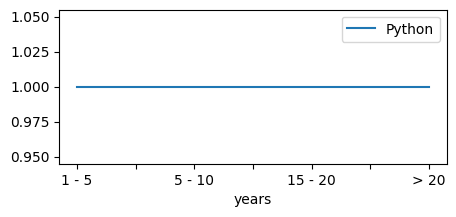

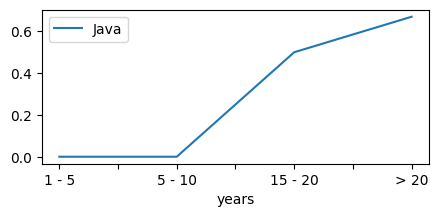

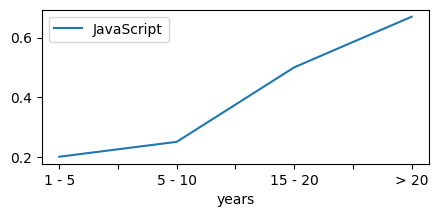

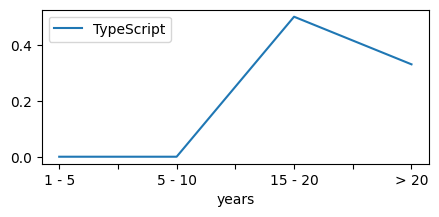

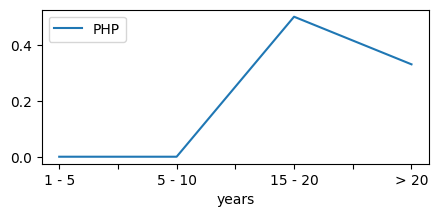

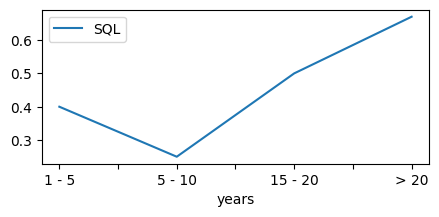

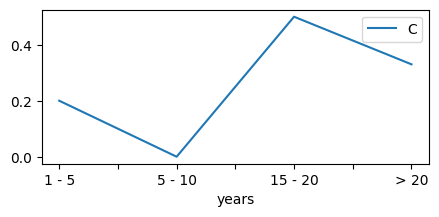

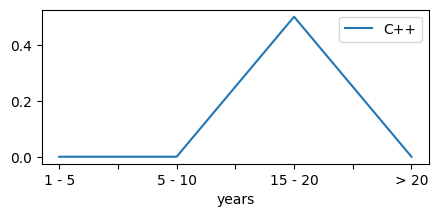

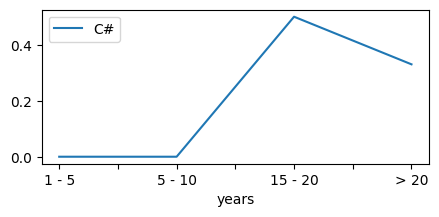

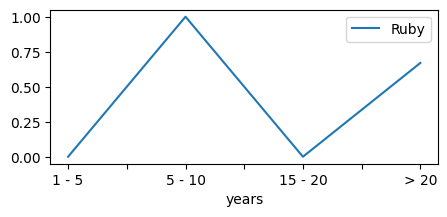

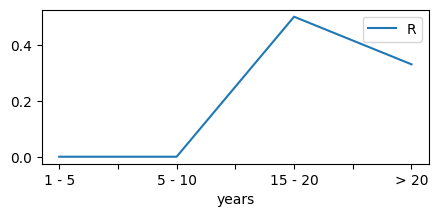

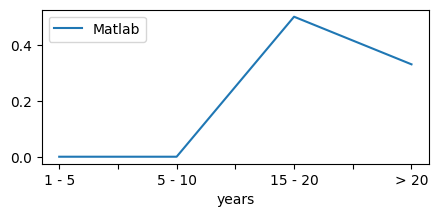

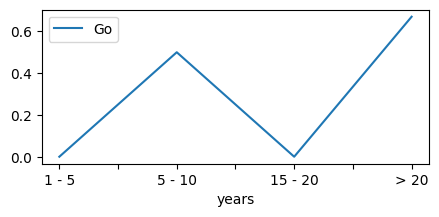

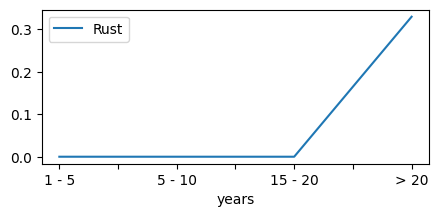

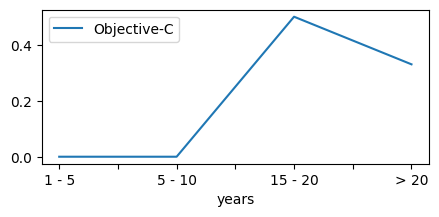

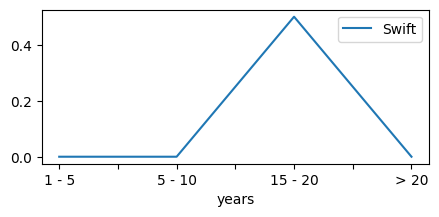

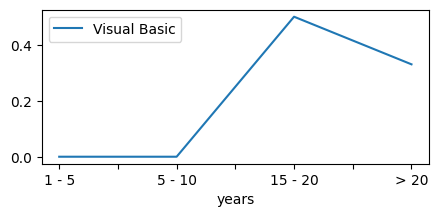

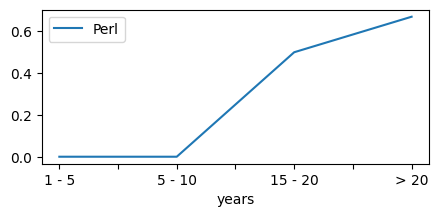

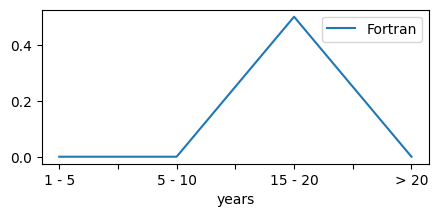

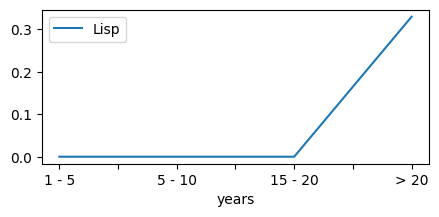

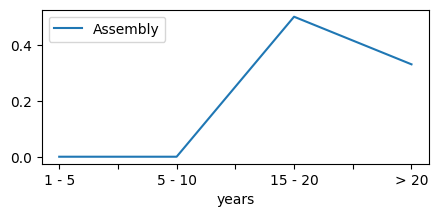

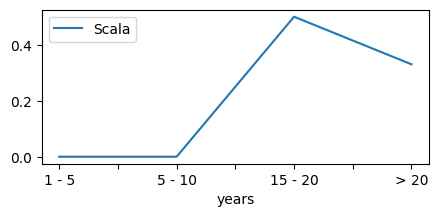

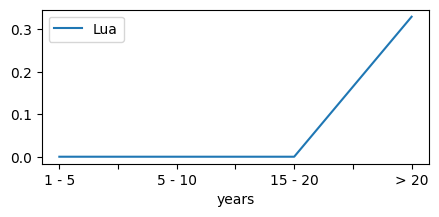

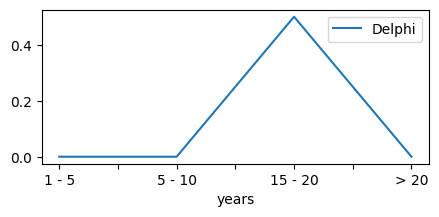

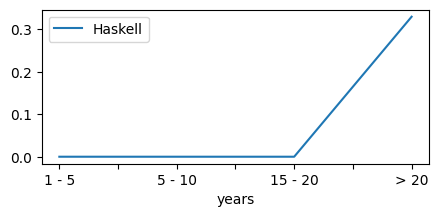

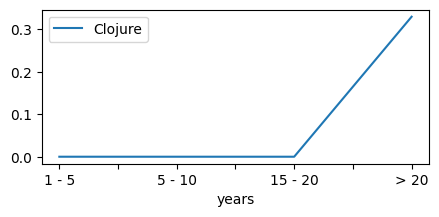

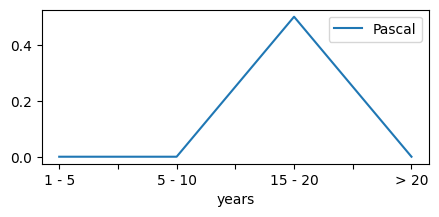

In [15]:
for i, lang in enumerate(as_percent.columns):
    plot = as_percent[[lang]].plot(figsize=(5, 2))